<a href="https://colab.research.google.com/github/kartik2627/Artificial-neural-network/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/58.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/143.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/476.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/131.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/8.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/273.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/38.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/234.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/130.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/156.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/353.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/188.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powdery Mildew/274.jpg
/kaggle/input/apple-leaf-disease-research/val/val/Powde

In [ ]:
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, Flatten, concatenate, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten



2024-06-03 12:52:45.125570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 12:52:45.125685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 12:52:45.307138: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
test_data='/kaggle/input/apple-leaf-disease-research/test/test'
train_data='/kaggle/input/apple-leaf-disease-research/train/train'
val_data='/kaggle/input/apple-leaf-disease-research/val/val'

In [ ]:
import pathlib
IMAGE_SIZE= 256
BATCH_SIZE=20

train_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=preprocess_input
)


In [ ]:
traingen = train_generator.flow_from_directory(
    train_data,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    shuffle = True
)

validgen = train_generator.flow_from_directory(
    val_data,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    shuffle = True
)

testgen = test_generator.flow_from_directory(
    test_data,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

Found 4687 images belonging to 13 classes.
Found 581 images belonging to 13 classes.
Found 599 images belonging to 13 classes.


In [ ]:
vgg19 = keras.applications.VGG19(
  include_top=False,
  weights="imagenet",
  input_shape=(256, 256, 3),
  pooling=None,
  classifier_activation="softmax"
)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
def count_immediate_folders(dir_path):
    count = 0
    for entry in os.listdir(dir_path):
        if os.path.isdir(os.path.join(dir_path, entry)):
            count += 1
    return count

# Example usage
directory = "/kaggle/input/apple-leaf-disease-research/test/test"
num_folders = count_immediate_folders(directory)
print("Number of immediate subdirectories:", num_folders)


Number of immediate subdirectories: 13


In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction= Dense(num_folders,activation='softmax')(x)

In [ ]:
model2 = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │       425,997 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,450,381 (78.01 MB)

 Trainable params: 425,997 (1.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 2,
                              verbose = 1)


rlr = ReduceLROnPlateau(monitor='val_loss',
                       factor=0.3,
                       patience=3,
                       min_lr=0.00001,
                       verbose=1)

callback_list = [earlystopping,rlr]

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer ='Adam',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history = model2.fit(
    traingen,
    epochs=25,
    validation_data=validgen,
    validation_steps=None,
    verbose=1,
    callbacks=callback_list
)

Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.4696 - loss: 2.2618 - precision_4: 0.5337 - recall_4: 0.4145

2024-06-03 13:43:01.743844: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65364: 2.53678, expected 2.17699
2024-06-03 13:43:01.743901: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65380: 2.56388, expected 2.20409
2024-06-03 13:43:01.743912: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65381: 2.54569, expected 2.1859
2024-06-03 13:43:01.743921: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65482: 2.57729, expected 2.2175
2024-06-03 13:43:01.744311: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131072: 3.63821, expected 2.67835
2024-06-03 13:43:01.744359: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131073: 5.0582, expected 4.09834
2024-06-03 13:43:01.744387: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131074: 5.50194, expected 4.54208
2024-06-03 13:43:01.744401:

147/147 ━━━━━━━━━━━━━━━━━━━━ 84s 533ms/step - accuracy: 0.4707 - loss: 2.2553 - precision_4: 0.5349 - recall_4: 0.4156 - val_accuracy: 0.8055 - val_loss: 9721.5947 - val_precision_4: 0.8544 - val_recall_4: 0.7780 - learning_rate: 0.0010
Epoch 2/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 74s 484ms/step - accuracy: 0.8092 - loss: 0.5900 - precision_4: 0.8462 - recall_4: 0.7815 - val_accuracy: 0.8193 - val_loss: 13453.3975 - val_precision_4: 0.8378 - val_recall_4: 0.8090 - learning_rate: 0.0010
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 74s 484ms/step - accuracy: 0.8396 - loss: 0.4857 - precision_4: 0.8598 - recall_4: 0.8250 - val_accuracy: 0.8141 - val_loss: 12981.7080 - val_precision_4: 0.8242 - val_recall_4: 0.7986 - learning_rate: 0.0010
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8658 - loss: 0.4527 - precision_4: 0.8804 - recall_4: 0.8522
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
147/147 ━━━━━━━━━━━━━━━━━━━━ 75s 490ms/step - accuracy: 0.86

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense

res = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))  # Assuming your image size is 224x224

x = GlobalAveragePooling2D()(res.output)
x = Flatten()(x)
prediction = Dense(13, activation='softmax')(x)
model = Model(inputs=res.input, outputs=prediction)


In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,614,349 (90.08 MB)

 Trainable params: 23,561,229 (89.88 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 5,
                              verbose = 1)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer ='Adam',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history = model.fit(
    traingen,
    epochs=25,
    validation_data=validgen,
    validation_steps=None,
    verbose=1,
    callbacks=callback_list
)

Epoch 1/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:56:26 73s/step - accuracy: 0.0938 - loss: 2.8758 - precision_2: 0.2500 - recall_2: 0.0312

W0000 00:00:1717419688.759259     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.6651 - loss: 1.2222 - precision_2: 0.7431 - recall_2: 0.5722

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
W0000 00:00:1717419794.833396     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 190s 805ms/step - accuracy: 0.6658 - loss: 1.2192 - precision_2: 0.7436 - recall_2: 0.5731 - val_accuracy: 0.0706 - val_loss: 18.7610 - val_precision_2: 0.0706 - val_recall_2: 0.0706 - learning_rate: 0.0010
Epoch 2/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 76s 494ms/step - accuracy: 0.8991 - loss: 0.2979 - precision_2: 0.9140 - recall_2: 0.8869 - val_accuracy: 0.0706 - val_loss: 8.7283 - val_precision_2: 0.0706 - val_recall_2: 0.0706 - learning_rate: 0.0010
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 76s 495ms/step - accuracy: 0.9191 - loss: 0.2482 - precision_2: 0.9311 - recall_2: 0.9079 - val_accuracy: 0.0878 - val_loss: 10.1437 - val_precision_2: 0.0878 - val_recall_2: 0.0878 - learning_rate: 0.0010
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 76s 494ms/step - accuracy: 0.9389 - loss: 0.1884 - precision_2: 0.9464 - recall_2: 0.9306 - val_accuracy: 0.0585 - val_loss: 5.7436 - val_precision_2: 0.0530 - val_recall_2: 0.0516 - learning_rate: 0.0010
Epoch 5/25
147/147 ━━━━━━━━━

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss,precision_2,recall_2,val_accuracy,val_loss,val_precision_2,val_recall_2,learning_rate
0,0.763601,0.787185,0.817978,0.700875,0.070568,18.761015,0.070568,0.070568,0.0010
1,0.895456,0.313408,0.909551,0.881801,0.070568,8.728328,0.070568,0.070568,0.0010
2,0.922125,0.232095,0.933100,0.910604,0.087780,10.143732,0.087780,0.087780,0.0010
3,0.939834,0.180745,0.948339,0.932153,0.058520,5.743557,0.053004,0.051635,0.0010
4,0.936207,0.180684,0.943723,0.930233,0.048193,4.781275,0.034247,0.008606,0.0010
5,0.946448,0.155609,0.953750,0.941540,0.208262,4.417882,0.237288,0.168675,0.0010
6,0.943674,0.163639,0.949622,0.937060,0.605852,1.281744,0.641879,0.564544,0.0010
7,0.947514,0.147143,0.953664,0.944101,0.939759,0.183749,0.942708,0.934596,0.0010
8,0.953915,0.125119,0.956765,0.949008,0.800344,0.503689,0.842105,0.771084,0.0010
9,0.959676,0.122353,0.963409,0.954982,0.767642,0.735809,0.802583,0.748709,0.0010


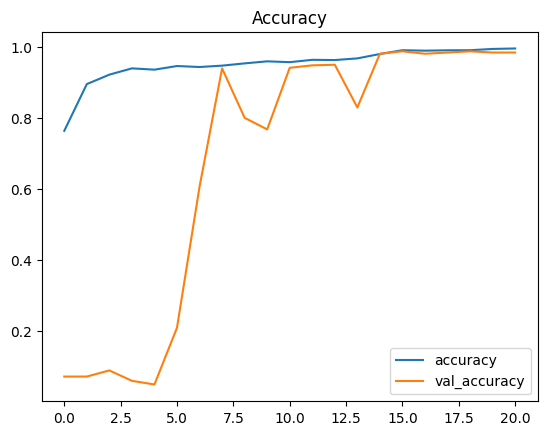

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()